SIMULACION MICROGOTA EVAPORACION CONSIDERANDO UN FLUJO DE AIRE Y PERDIDA DE MASA LINEAL
======================

Considerando parte de la gota se evapora y un flujo del aire $\vec{v}_f= v_f \hat{y}$:

$$m\frac{dv}{dt} + v\frac{dm}{dt}= E + F_d - mg = \frac{4\pi}{3} r_d^3 \rho_a g - 6\pi \eta r_d (v - v_f) - \frac{4\pi}{3} r_d^3 \rho_d g $$ 

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2(t) \rho_d}  (v - v_f)  - \frac{v}{m}\frac{dm}{dt}  $$

Se tiene la perdida de masa de la siguiente forma
$$ m= m_0 - \alpha t  \longrightarrow r_d(t)= \left( r_0^3 - \frac{3\alpha t}{4 \pi \rho}  \right)^{1/3}$$ 

Luego la ecuacion de movimiento sera 

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2(t) \rho_d}  (v - v_f)  - \frac{3 \alpha}{4\pi r_d^3 \rho_d} v$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## DEFINICION DE ALGUNAS VARIABLES
# alpha en kg.s^-1
# v_d en m/s

pi=np.pi

ro_a= 1.225 # kg/m3
ro_d= 1000 # kg/m3
eta= 1.849e-5 # kg/m.s 
r_0= 50e-6 # m
g= 9.81 # m/s2
#alpha= 10

y0=[0,0]
t_inicial= 0
t_maximo= 3
t_step= 0.0001
time= np.arange(t_inicial, t_maximo+t_step, t_step)


In [2]:
def gota_lineal(y, time, alpha_lineal= 1.74e-10, velocidad_flujo= 0.01):
    
    radio=np.float_power(r_0**3 - (3*alpha_lineal*time/(4 * np.pi * ro_d)),1/3)
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g ) - (9 *eta / (2 * radio**2 * ro_d)) * (y[1] - velocidad_flujo) + (3 * alpha_lineal/(4*np.pi*radio**3*ro_d))  * y[1]
    return dy

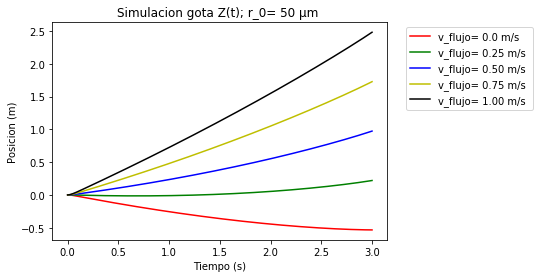

In [3]:
plt.figure()

solucion_lineal_1= odeint(gota_lineal, y0, time, args=(1.74e-10, 0))
solucion_lineal_2= odeint(gota_lineal, y0, time, args=(1.74e-10, 0.25))
solucion_lineal_3= odeint(gota_lineal, y0, time, args=(1.74e-10, 0.50))
solucion_lineal_4= odeint(gota_lineal, y0, time, args=(1.74e-10, 0.75))
solucion_lineal_5= odeint(gota_lineal, y0, time, args=(1.74e-10, 1.00))


plt.plot(time,solucion_lineal_1[:,0],'r', label='v_flujo= 0.0 m/s ')
plt.plot(time,solucion_lineal_2[:,0],'g', label='v_flujo= 0.25 m/s ')
plt.plot(time,solucion_lineal_3[:,0],'b', label='v_flujo= 0.50 m/s ')
plt.plot(time,solucion_lineal_4[:,0],'y', label='v_flujo= 0.75 m/s ')
plt.plot(time,solucion_lineal_5[:,0],'k', label='v_flujo= 1.00 m/s ')

ax=plt.gca()
ax.set_title('Simulacion gota Z(t); r_0= 50 \N{greek small letter mu}m ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (m)')
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1)
plt.axis()
plt.show()

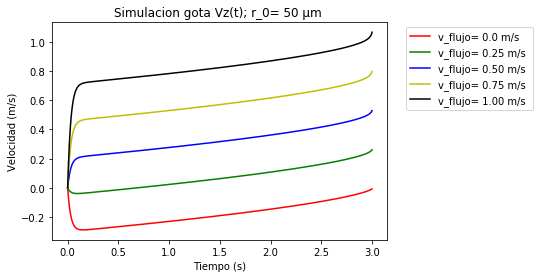

In [4]:
plt.plot(time,solucion_lineal_1[:,1],'r', label='v_flujo= 0.0 m/s ')
plt.plot(time,solucion_lineal_2[:,1],'g', label='v_flujo= 0.25 m/s ')
plt.plot(time,solucion_lineal_3[:,1],'b', label='v_flujo= 0.50 m/s ')
plt.plot(time,solucion_lineal_4[:,1],'y', label='v_flujo= 0.75 m/s ')
plt.plot(time,solucion_lineal_5[:,1],'k', label='v_flujo= 1.00 m/s ')

ax=plt.gca()
ax.set_title('Simulacion gota Vz(t); r_0= 50 \N{greek small letter mu}m ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (m/s)')
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1)
plt.axis()
plt.show()

In [5]:
alpha_lineal= 1.74e-10
tiempo_desp= (4/3)*np.pi*ro_d*r_0**3/alpha_lineal

print('El tiempo en que demora en desvanecerse la gota es {:.2e} s para un radio de {:.1e} m para un \N{greek small letter alpha} de {:.2e} kg/s'.format(tiempo_desp,r_0,alpha_lineal))

tf=0.003
alphat= (4*np.pi*ro_d*r_0**3)/(3*tf)
print('\N{greek small letter alpha} de {:.2e} kg/s para un tiempo de {:.3e} s'.format(alphat, tf))

El tiempo en que demora en desvanecerse la gota es 3.01e+00 s para un radio de 5.0e-05 m para un α de 1.74e-10 kg/s
α de 1.75e-07 kg/s para un tiempo de 3.000e-03 s


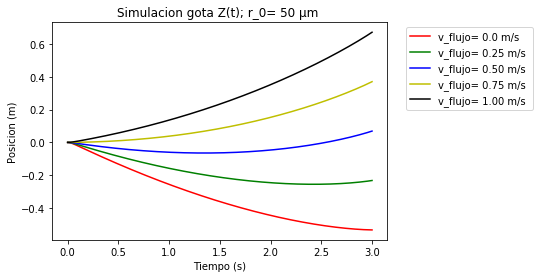

In [6]:
plt.figure()

solucion_lineal_1= odeint(gota_lineal, y0, time, args=(1.74e-10, 0))
solucion_lineal_2= odeint(gota_lineal, y0, time, args=(1.74e-10, 0.1))
solucion_lineal_3= odeint(gota_lineal, y0, time, args=(1.74e-10, 0.2))
solucion_lineal_4= odeint(gota_lineal, y0, time, args=(1.74e-10, 0.3))
solucion_lineal_5= odeint(gota_lineal, y0, time, args=(1.74e-10, 0.4))


plt.plot(time,solucion_lineal_1[:,0],'r', label='v_flujo= 0.0 m/s ')
plt.plot(time,solucion_lineal_2[:,0],'g', label='v_flujo= 0.25 m/s ')
plt.plot(time,solucion_lineal_3[:,0],'b', label='v_flujo= 0.50 m/s ')
plt.plot(time,solucion_lineal_4[:,0],'y', label='v_flujo= 0.75 m/s ')
plt.plot(time,solucion_lineal_5[:,0],'k', label='v_flujo= 1.00 m/s ')

ax=plt.gca()
ax.set_title('Simulacion gota Z(t); r_0= 50 \N{greek small letter mu}m ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (m)')
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1)
plt.axis()
plt.show()

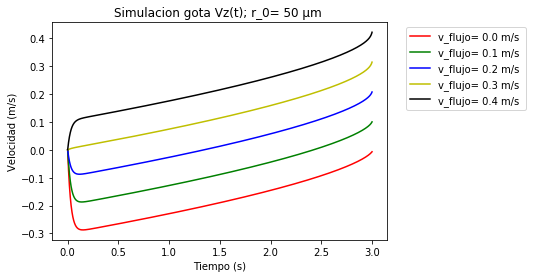

In [7]:
plt.plot(time,solucion_lineal_1[:,1],'r', label='v_flujo= 0.0 m/s ')
plt.plot(time,solucion_lineal_2[:,1],'g', label='v_flujo= 0.1 m/s ')
plt.plot(time,solucion_lineal_3[:,1],'b', label='v_flujo= 0.2 m/s ')
plt.plot(time,solucion_lineal_4[:,1],'y', label='v_flujo= 0.3 m/s ')
plt.plot(time,solucion_lineal_5[:,1],'k', label='v_flujo= 0.4 m/s ')

ax=plt.gca()
ax.set_title('Simulacion gota Vz(t); r_0= 50 \N{greek small letter mu}m ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (m/s)')
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1)
plt.axis()
plt.show()

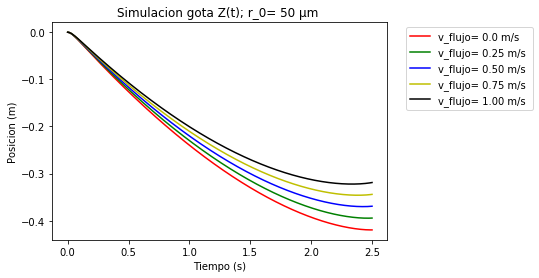

In [8]:
t_incial= 0
t_maximo= 2.5
t_step= 0.0001
time= np.arange(t_inicial, t_maximo+t_step, t_step)

plt.figure()

solucion_lineal_1= odeint(gota_lineal, y0, time, args=(2.09e-10, 0.01))
solucion_lineal_2= odeint(gota_lineal, y0, time, args=(2.09e-10, 0.02))
solucion_lineal_3= odeint(gota_lineal, y0, time, args=(2.09e-10, 0.03))
solucion_lineal_4= odeint(gota_lineal, y0, time, args=(2.09e-10, 0.04))
solucion_lineal_5= odeint(gota_lineal, y0, time, args=(2.09e-10, 0.05))


plt.plot(time,solucion_lineal_1[:,0],'r', label='v_flujo= 0.0 m/s ')
plt.plot(time,solucion_lineal_2[:,0],'g', label='v_flujo= 0.25 m/s ')
plt.plot(time,solucion_lineal_3[:,0],'b', label='v_flujo= 0.50 m/s ')
plt.plot(time,solucion_lineal_4[:,0],'y', label='v_flujo= 0.75 m/s ')
plt.plot(time,solucion_lineal_5[:,0],'k', label='v_flujo= 1.00 m/s ')

ax=plt.gca()
ax.set_title('Simulacion gota Z(t); r_0= 50 \N{greek small letter mu}m ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (m)')
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1)
plt.axis()
plt.show()

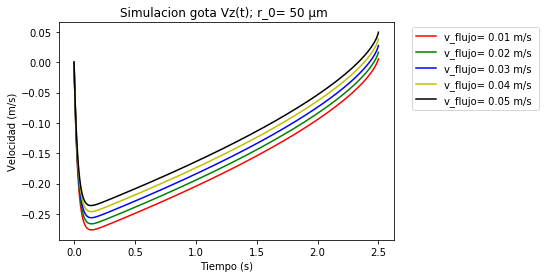

In [9]:
plt.plot(time,solucion_lineal_1[:,1],'r', label='v_flujo= 0.01 m/s ')
plt.plot(time,solucion_lineal_2[:,1],'g', label='v_flujo= 0.02 m/s ')
plt.plot(time,solucion_lineal_3[:,1],'b', label='v_flujo= 0.03 m/s ')
plt.plot(time,solucion_lineal_4[:,1],'y', label='v_flujo= 0.04 m/s ')
plt.plot(time,solucion_lineal_5[:,1],'k', label='v_flujo= 0.05 m/s ')

ax=plt.gca()
ax.set_title('Simulacion gota Vz(t); r_0= 50 \N{greek small letter mu}m ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (m/s)')
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1)
plt.axis()
plt.show()